<a href="https://colab.research.google.com/github/Cyclotron17/Django-Inventory-Management-System/blob/master/sambhrant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import  keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Data_Hackathon/Dataset_Hackathon.xlsx')

In [ ]:
df

,Country,Commodity,Flow,Quantity,Category,Volume (m^3),Distance from India (m),Frieght Cost (USD)
0,Albania,"Poultry cuts & offal, except livers, fresh or ...",Export,34,02_meat_and_edible_meat_offal,12,5940.830501,4840.697837
1,Albania,"Poultry cuts & offal, except livers, fresh or ...",Export,23,02_meat_and_edible_meat_offal,12,5940.830501,3069.710823
2,Albania,"Swine meat, salted/dried/smoked not ham/should...",Export,11,02_meat_and_edible_meat_offal,12,5940.830501,1475.822511
3,Albania,"Fowls, domestic, whole, frozen",Export,50,02_meat_and_edible_meat_offal,12,5940.830501,7083.948054
4,Albania,"Meat and edible offal nes fresh, chilled or fr...",Export,71,02_meat_and_edible_meat_offal,12,5940.830501,9976.560176
...,...,...,...,...,...,...,...,...
81440,Malawi,"Oil seeds and oleaginous fruits, nes",Export,85,12_oil_seed_oleagic_fruits_grain_seed_fruit_et...,4,6170.000164,2767.338021
81441,Malawi,"Seed, beet, except sugar, for sowing",Export,3,12_oil_seed_oleagic_fruits_grain_seed_fruit_et...,4,6170.000164,162.784589
81442,Malawi,Soya beans,Export,1,12_oil_seed_oleagic_fruits_grain_seed_fruit_et...,4,6170.000164,162.784589
81443,Malawi,Ground-nuts in shell not roasted or cooked,Export,6,12_oil_seed_oleagic_fruits_grain_seed_fruit_et...,4,6170.000164,284.873032


In [ ]:
df.isnull().sum()

Country                    0
Commodity                  0
Flow                       0
Quantity                   0
Category                   0
Volume (m^3)               0
Distance from India (m)    0
Frieght Cost (USD)         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81445 entries, 0 to 81444
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  81445 non-null  object 
 1   Commodity                81445 non-null  object 
 2   Flow                     81445 non-null  object 
 3   Quantity                 81445 non-null  int64  
 4   Category                 81445 non-null  object 
 5   Volume (m^3)             81445 non-null  int64  
 6   Distance from India (m)  81445 non-null  float64
 7   Frieght Cost (USD)       81445 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


In [ ]:
df['Flow'].value_counts()

Export       72361
Re-Export     9084
Name: Flow, dtype: int64

In [ ]:
df['Category'].value_counts()

09_coffee_tea_mate_and_spices                             12231
07_edible_vegetables_and_certain_roots_and_tubers          9160
03_fish_crustaceans_molluscs_aquatic_invertebrates_ne      8608
08_edible_fruit_nuts_peel_of_citrus_fruit_melons           8030
11_milling_products_malt_starches_inulin_wheat_glute       7908
12_oil_seed_oleagic_fruits_grain_seed_fruit_etc_ne         7163
04_dairy_products_eggs_honey_edible_animal_product_nes     7157
02_meat_and_edible_meat_offal                              6912
05_products_of_animal_origin_nes                           5223
10_cereals                                                 5040
06_live_trees_plants_bulbs_roots_cut_flowers_etc           4013
Name: Category, dtype: int64

In [ ]:


df = pd.get_dummies(df,columns=['Category'],drop_first=True)



In [ ]:
df.head()

,Country,Commodity,Flow,Quantity,Volume (m^3),Distance from India (m),Frieght Cost (USD),Category_03_fish_crustaceans_molluscs_aquatic_invertebrates_ne,Category_04_dairy_products_eggs_honey_edible_animal_product_nes,Category_05_products_of_animal_origin_nes,Category_06_live_trees_plants_bulbs_roots_cut_flowers_etc,Category_07_edible_vegetables_and_certain_roots_and_tubers,Category_08_edible_fruit_nuts_peel_of_citrus_fruit_melons,Category_09_coffee_tea_mate_and_spices,Category_10_cereals,Category_11_milling_products_malt_starches_inulin_wheat_glute,Category_12_oil_seed_oleagic_fruits_grain_seed_fruit_etc_ne
0,Albania,"Poultry cuts & offal, except livers, fresh or ...",Export,34,12,5940.830501,4840.697837,0,0,0,0,0,0,0,0,0,0
1,Albania,"Poultry cuts & offal, except livers, fresh or ...",Export,23,12,5940.830501,3069.710823,0,0,0,0,0,0,0,0,0,0
2,Albania,"Swine meat, salted/dried/smoked not ham/should...",Export,11,12,5940.830501,1475.822511,0,0,0,0,0,0,0,0,0,0
3,Albania,"Fowls, domestic, whole, frozen",Export,50,12,5940.830501,7083.948054,0,0,0,0,0,0,0,0,0,0
4,Albania,"Meat and edible offal nes fresh, chilled or fr...",Export,71,12,5940.830501,9976.560176,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_new=df.drop(columns=['Country','Commodity','Flow'])
df_new.head()


,Quantity,Volume (m^3),Distance from India (m),Frieght Cost (USD),Category_03_fish_crustaceans_molluscs_aquatic_invertebrates_ne,Category_04_dairy_products_eggs_honey_edible_animal_product_nes,Category_05_products_of_animal_origin_nes,Category_06_live_trees_plants_bulbs_roots_cut_flowers_etc,Category_07_edible_vegetables_and_certain_roots_and_tubers,Category_08_edible_fruit_nuts_peel_of_citrus_fruit_melons,Category_09_coffee_tea_mate_and_spices,Category_10_cereals,Category_11_milling_products_malt_starches_inulin_wheat_glute,Category_12_oil_seed_oleagic_fruits_grain_seed_fruit_etc_ne
0,34,12,5940.830501,4840.697837,0,0,0,0,0,0,0,0,0,0
1,23,12,5940.830501,3069.710823,0,0,0,0,0,0,0,0,0,0
2,11,12,5940.830501,1475.822511,0,0,0,0,0,0,0,0,0,0
3,50,12,5940.830501,7083.948054,0,0,0,0,0,0,0,0,0,0
4,71,12,5940.830501,9976.560176,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_new_tr=df_new

In [ ]:
from sklearn.preprocessing import minmax_scale
df_new_tr[['Distance from India (m)','Frieght Cost (USD)']]=minmax_scale(df_new_tr[['Distance from India (m)','Frieght Cost (USD)']])
df_new_tr

,Quantity,Volume (m^3),Distance from India (m),Frieght Cost (USD),Category_03_fish_crustaceans_molluscs_aquatic_invertebrates_ne,Category_04_dairy_products_eggs_honey_edible_animal_product_nes,Category_05_products_of_animal_origin_nes,Category_06_live_trees_plants_bulbs_roots_cut_flowers_etc,Category_07_edible_vegetables_and_certain_roots_and_tubers,Category_08_edible_fruit_nuts_peel_of_citrus_fruit_melons,Category_09_coffee_tea_mate_and_spices,Category_10_cereals,Category_11_milling_products_malt_starches_inulin_wheat_glute,Category_12_oil_seed_oleagic_fruits_grain_seed_fruit_etc_ne
0,34,12,0.308814,0.106937,0,0,0,0,0,0,0,0,0,0
1,23,12,0.308814,0.067540,0,0,0,0,0,0,0,0,0,0
2,11,12,0.308814,0.032082,0,0,0,0,0,0,0,0,0,0
3,50,12,0.308814,0.156841,0,0,0,0,0,0,0,0,0,0
4,71,12,0.308814,0.221191,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81440,85,4,0.323176,0.060813,0,0,0,0,0,0,0,0,0,1
81441,3,4,0.323176,0.002871,0,0,0,0,0,0,0,0,0,1
81442,1,4,0.323176,0.002871,0,0,0,0,0,0,0,0,0,1
81443,6,4,0.323176,0.005587,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_new_tr.head()

,Quantity,Volume (m^3),Distance from India (m),Frieght Cost (USD),Category_03_fish_crustaceans_molluscs_aquatic_invertebrates_ne,Category_04_dairy_products_eggs_honey_edible_animal_product_nes,Category_05_products_of_animal_origin_nes,Category_06_live_trees_plants_bulbs_roots_cut_flowers_etc,Category_07_edible_vegetables_and_certain_roots_and_tubers,Category_08_edible_fruit_nuts_peel_of_citrus_fruit_melons,Category_09_coffee_tea_mate_and_spices,Category_10_cereals,Category_11_milling_products_malt_starches_inulin_wheat_glute,Category_12_oil_seed_oleagic_fruits_grain_seed_fruit_etc_ne
0,34,12,0.308814,0.106937,0,0,0,0,0,0,0,0,0,0
1,23,12,0.308814,0.067540,0,0,0,0,0,0,0,0,0,0
2,11,12,0.308814,0.032082,0,0,0,0,0,0,0,0,0,0
3,50,12,0.308814,0.156841,0,0,0,0,0,0,0,0,0,0
4,71,12,0.308814,0.221191,0,0,0,0,0,0,0,0,0,0


In [ ]:


X = df_new_tr.drop(columns=['Frieght Cost (USD)'])
y = df_new_tr['Frieght Cost (USD)']

In [ ]:


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:


model = Sequential()

model.add(Dense(13,activation='linear',input_dim=13))
model.add(Dense(12,activation='linear'))
model.add(Dense(1,activation='linear'))



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 13)                182       
                                                                 
 dense_11 (Dense)            (None, 12)                168       
                                                                 
 dense_12 (Dense)            (None, 1)                 13        
                                                                 
Total params: 363
Trainable params: 363
Non-trainable params: 0
_________________________________________________________________


In [ ]:


model.compile(optimizer='Adam',loss='mse',metrics=['accuracy'])



In [ ]:
df.shape



(81445, 17)

In [ ]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/50
1043/1043 [==============================] - 3s 2ms/step - loss: 2.6922 - accuracy: 9.5925e-05 - val_loss: 0.0090 - val_accuracy: 3.0694e-04
Epoch 2/50
1043/1043 [==============================] - 3s 2ms/step - loss: 0.0062 - accuracy: 9.5925e-05 - val_loss: 0.0044 - val_accuracy: 3.0694e-04
Epoch 3/50
1043/1043 [==============================] - 2s 2ms/step - loss: 0.0042 - accuracy: 9.5925e-05 - val_loss: 0.0040 - val_accuracy: 3.0694e-04
Epoch 4/50
1043/1043 [==============================] - 3s 3ms/step - loss: 0.0043 - accuracy: 9.5925e-05 - val_loss: 0.0064 - val_accuracy: 3.0694e-04
Epoch 5/50
1043/1043 [==============================] - 2s 2ms/step - loss: 0.0046 - accuracy: 9.5925e-05 - val_loss: 0.0042 - val_accuracy: 3.0694e-04
Epoch 6/50
1043/1043 [==============================] - 2s 2ms/step - loss: 0.0054 - accuracy: 9.5925e-05 - val_loss: 0.0044 - val_accuracy: 3.0694e-04
Epoch 7/50
1043/1043 [==============================] - 2s 2ms/step - loss: 0.0067 - acc

In [ ]:
y_pred = model.predict(X_test)


510/510 [==============================] - 1s 1ms/step


In [ ]:
y_pred

array([[ 0.30426192],
       [ 0.26432008],
       [-0.05988048],
       ...,
       [ 0.12258787],
       [ 0.06581761],
       [ 0.21170376]], dtype=float32)

In [ ]:
y_test=y_test.to_numpy()

In [ ]:
y_test

array([0.19376916, 0.33076175, 0.00116215, ..., 0.09479511, 0.02857641,
       0.10424729])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

ValueError: ignored

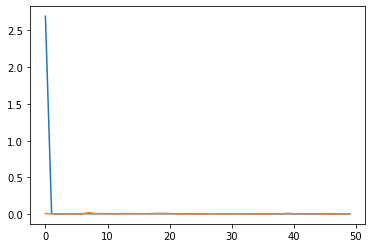

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


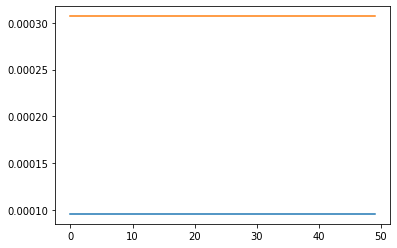

In [ ]:


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

